## Calibrate Camera 

In [1]:
import numpy as np
import cv2
import glob, os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chessboard corners
nx = 9
ny = 6

# Image width and heihgt
width = 1280
height = 720
channels = 3

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

image_files = glob.glob('camera_cal/*.jpg')

for fname in image_files:
    print(fname)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        plt.show()
    else:
        print("Failed to find chessboard corners")

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (width, channels) , None, None)

camera_cal\calibration1.jpg
Failed to find chessboard corners
camera_cal\calibration10.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration11.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration12.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration13.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration14.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration15.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration16.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration17.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration18.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration19.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration2.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration20.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration3.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration4.jpg
Failed to find chessboard corners
camera_cal\calibration5.jpg
Failed to find chessboard corners
camera_cal\calibration6.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration7.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration8.jpg


<Figure size 640x480 with 1 Axes>

camera_cal\calibration9.jpg


<Figure size 640x480 with 1 Axes>

## Show Calibration Example

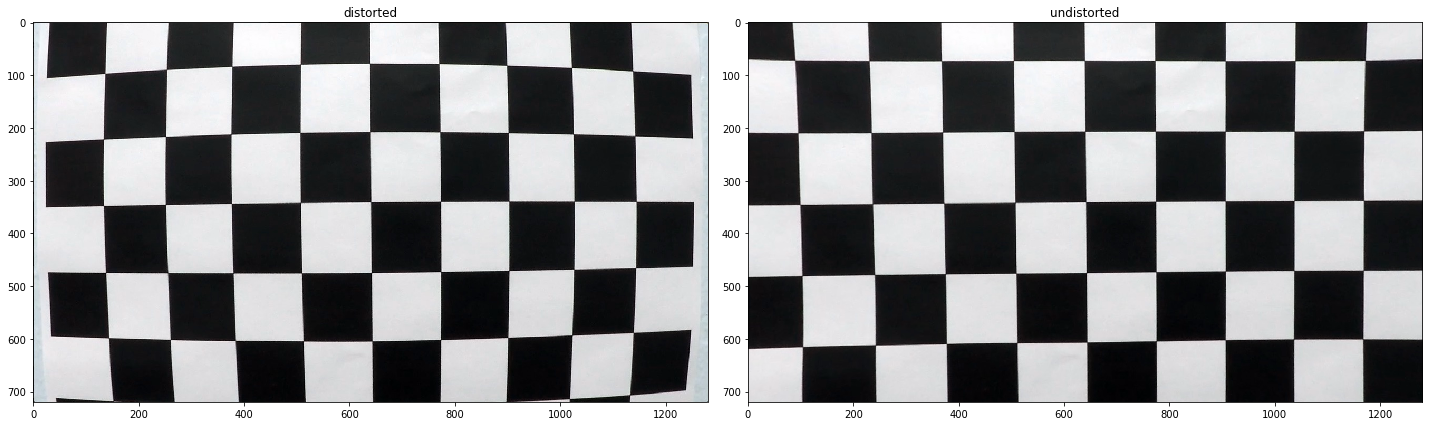

In [2]:
## Applies distortion correction
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

image = cv2.imread('camera_cal\calibration1.jpg')
undist_image = undistort(image)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image)
ax1.set_title('distorted')
ax2.imshow(undist_image)
ax2.set_title('undistorted')
fig.set_size_inches(20, 6)
fig.tight_layout()
fig.savefig('output_images/camera_calibration.jpg')

## Test Image

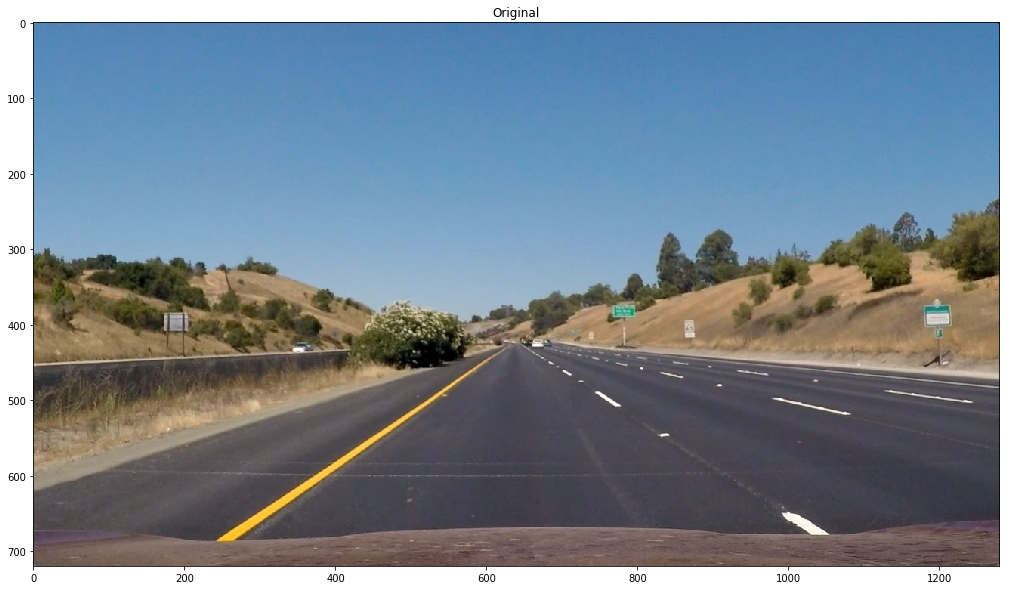

In [3]:
image = cv2.imread('test_images/straight_lines1.jpg')
#image = cv2.imread('test_images/test5.jpg')

# Changes color channels from BGR to RGB
def toRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(toRGB(image))
ax1.set_title('Original')
fig.set_size_inches(20, 10)
#fig.tight_layout()
plt.savefig('output_images/original.jpg')

## Distortion Correction

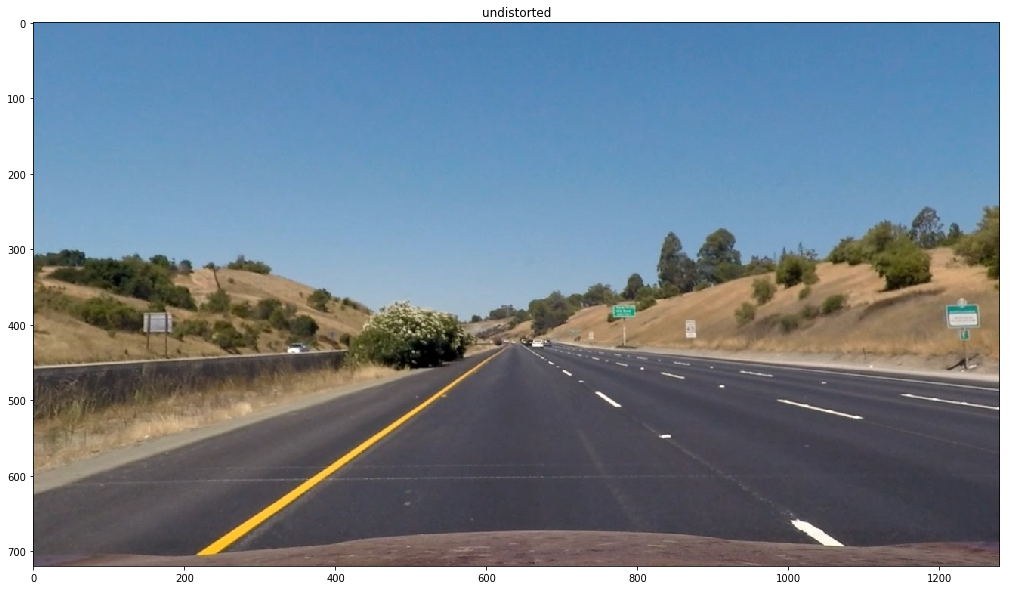

In [4]:
# Create undistorted image
undistorted = undistort(image)

fig, (ax2) = plt.subplots(1, 1)
ax2.imshow(toRGB(undistorted))
ax2.set_title('undistorted')
fig.set_size_inches(20, 10)
#fig.tight_layout()
plt.savefig('output_images/undistorted.jpg')

## Perspective Transform

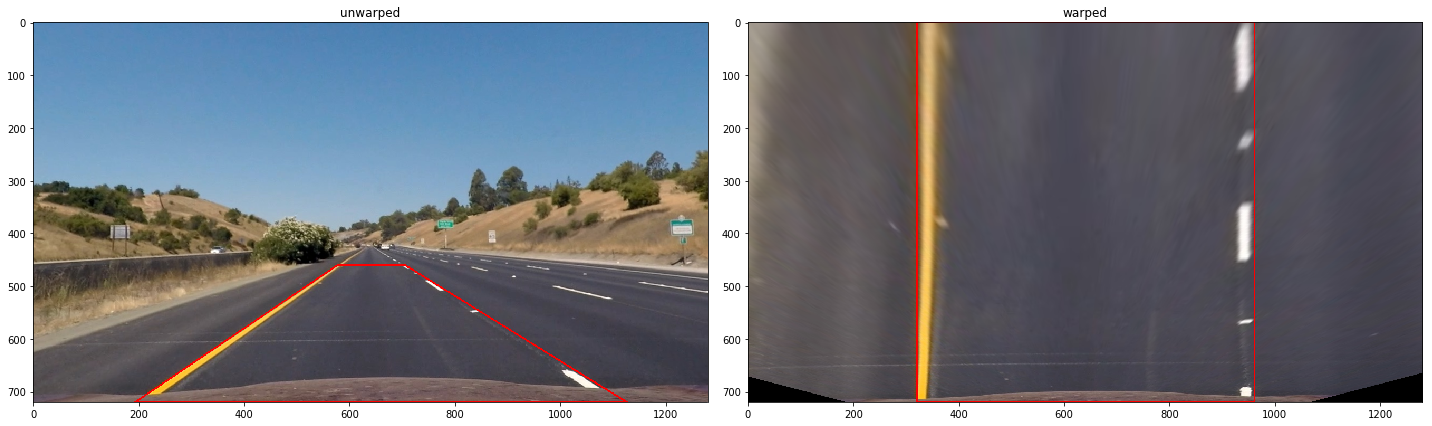

In [5]:
# Computes the transformation matrix and its inverse
def getTransformMatrix():
    src = np.float32(
        [[(width/2) - 63, height/2 + 100],
        [((width/6) - 20), height],
        [(width*5 / 6) + 60, height],
        [(width/2 + 65), height/2 + 100]])
    dst = np.float32(
        [[(width/4), 0],
        [(width/4), height],
        [(width*3 / 4), height],
        [(width*3 / 4), 0]])

    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    return M, Minv, src, dst

# Applies the perspective transform
def perspectiveTransform(image, M):
    return cv2.warpPerspective(image, M, (width, height), flags=cv2.INTER_LINEAR)

# Draws the polygons of src and dst points on the images
def overlaySrcAndDes(image, warped, src, dst):
    img_cp = np.copy(image)
    warped_cp = np.copy(warped)
    cv2.line(img_cp, tuple(src[0]), tuple(src[1]), [0,0,255], 2)
    cv2.line(img_cp, tuple(src[1]), tuple(src[2]), [0,0,255], 2)
    cv2.line(img_cp, tuple(src[2]), tuple(src[3]), [0,0,255], 2)
    cv2.line(img_cp, tuple(src[3]), tuple(src[0]), [0,0,255], 2)
    
    cv2.line(warped_cp, tuple(dst[0]), tuple(dst[1]), [0,0,255], 2)
    cv2.line(warped_cp, tuple(dst[1]), tuple(dst[2]), [0,0,255], 2)
    cv2.line(warped_cp, tuple(dst[2]), tuple(dst[3]), [0,0,255], 2)
    cv2.line(warped_cp, tuple(dst[3]), tuple(dst[0]), [0,0,255], 2)
    
    return img_cp, warped_cp


M, Minv, src, dst = getTransformMatrix()
#print(src)
#print(dst)

warped = perspectiveTransform(undistorted, M)
img_overlay, warped_overlay = overlaySrcAndDes(undistorted, warped, src, dst)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(toRGB(img_overlay))
ax1.set_title('unwarped')
ax2.imshow(toRGB(warped_overlay))
ax2.set_title('warped')
fig.set_size_inches(20, 6)
fig.tight_layout()
fig.savefig('output_images/perspective_transform.jpg')


## Feature Extraction

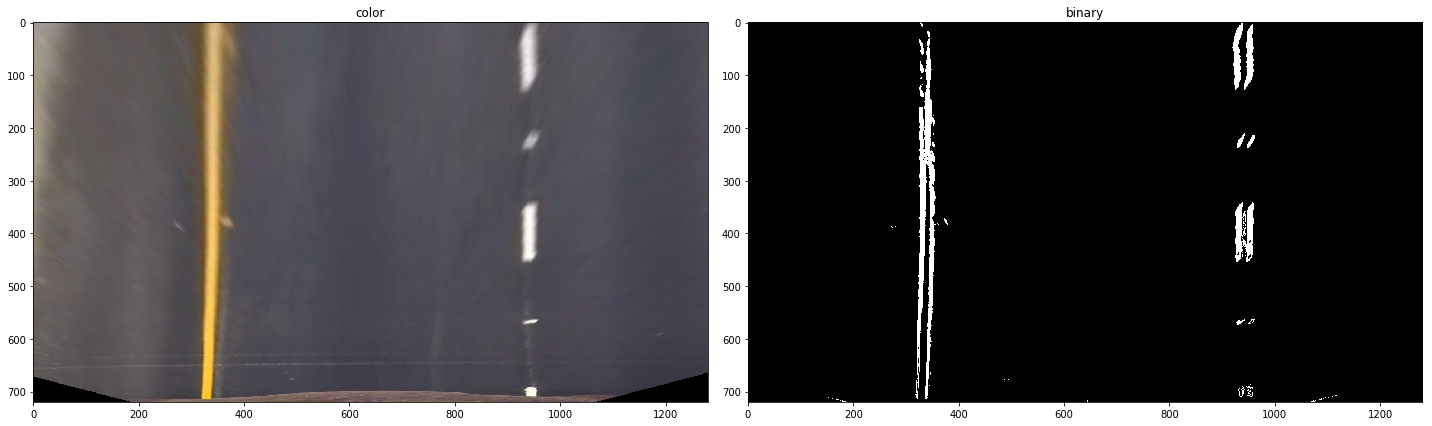

In [6]:
def s_sx_threshold(img, s_thresh=(140, 200), sx_thresh=(35, 105)):
    img = np.copy(img)
    # Convert to HLS color space and separate the channels
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    sx_binary = sobelXThreshold(l_channel, sx_thresh)
    s_binary = threshold(s_channel, s_thresh)
    
    return dismissBorders(sx_binary | s_binary) 

def sobelXThreshold(gray, thresh, sobel_kernel=7):
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Threshold x gradient
    binary = threshold(scaled_sobel, thresh)
    
    return binary

def threshold(gray, thresh):
    binary = np.zeros_like(gray)
    binary[(gray >= thresh[0]) & (gray <= thresh[1])] = 1
    
    return binary

def dismissBorders(binary, left=150, right=width-150):
    cp = np.copy(binary)
    cp[0:height, 0:left] = 0
    cp[0:height, right:width] = 0
    return cp

binary_warped = s_sx_threshold(warped)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(toRGB(warped))
ax1.set_title('color')
ax2.imshow(binary_warped, cmap=plt.cm.gray)
ax2.set_title('binary')
fig.set_size_inches(20, 6)
fig.tight_layout()
fig.savefig('output_images/binary.jpg')

## Histogram Peaks

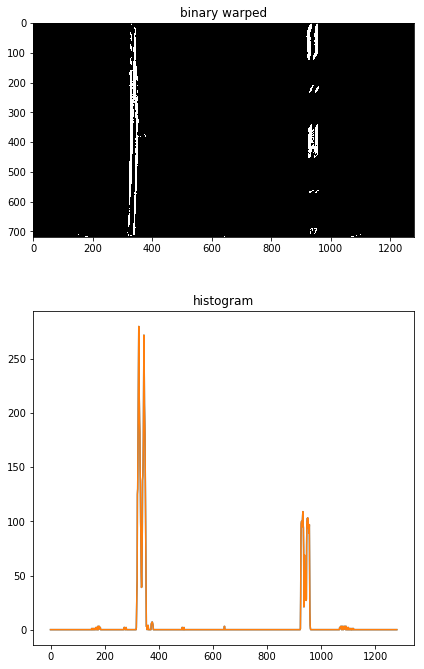

In [7]:
def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # Sum across image pixels vertically - make sure to set an `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

# Create histogram of image binary activations
histogram = hist(binary_warped)

# Visualize the resulting histogram
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.imshow(binary_warped, cmap=plt.cm.gray)
ax1.set_title('binary warped')
ax2.plot(histogram)
ax2.set_title('histogram')
fig.set_size_inches(6, 10)
fig.tight_layout()
fig.savefig('output_images/histogram.jpg')
plt.plot(histogram)
plt.show()

In [8]:
def find_lane_pixels_sliding_window(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = hist(binary_warped)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
            (win_xleft_high,win_y_high),(0,255,0), 3) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
            (win_xright_high,win_y_high),(0,255,0), 3) 
        
        ### Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img

def fit_poly(leftx, lefty, rightx, righty):
    ### Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    return left_fit, right_fit

def create_plot_data(left_fit, right_fit):
    # Generate x and y values for plotting
    ploty = np.linspace(0, height-1, height)
     ### Calc both polynomials using ploty, left_fit and right_fit ###
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = None
        right_fitx = None
        ploty = None
    
    return left_fitx, right_fitx, ploty
    

In [9]:
# Polynomial fit values from the previous frame
# Make sure to grab the actual values from the previous step in your project!

def find_lane_pixels_around_last_fit(binary_warped, left_fit_last, right_fit_last):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit_last[0]*(nonzeroy**2) + left_fit_last[1]*nonzeroy + 
                    left_fit_last[2] - margin)) & (nonzerox < (left_fit_last[0]*(nonzeroy**2) + 
                    left_fit_last[1]*nonzeroy + left_fit_last[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit_last[0]*(nonzeroy**2) + right_fit_last[1]*nonzeroy + 
                    right_fit_last[2] - margin)) & (nonzerox < (right_fit_last[0]*(nonzeroy**2) + 
                    right_fit_last[1]*nonzeroy + right_fit_last[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fit, right_fit = fit_poly(leftx, lefty, rightx, righty)
    left_fitx, right_fitx, ploty = create_plot_data(left_fit, right_fit)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    out_img = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    ## End visualization steps ##
    
    return leftx, lefty, rightx, righty, out_img


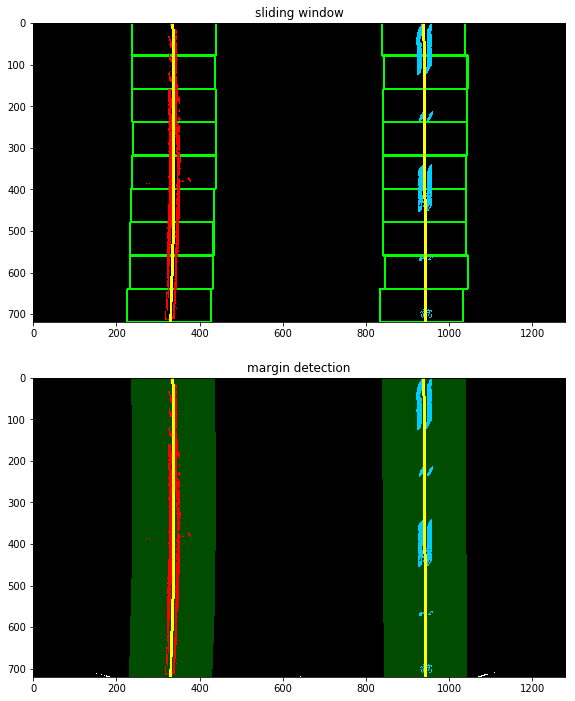

In [10]:
def find_lane_pixels_and_fit_poly(binary_warped, left_fit_last, right_fit_last):
    # Find our lane pixels first
    if left_fit_last is None:
        leftx, lefty, rightx, righty, out_img = find_lane_pixels_sliding_window(binary_warped)
    else:
        leftx, lefty, rightx, righty, out_img = find_lane_pixels_around_last_fit(binary_warped, left_fit_last, right_fit_last)

    # Fit the result
    left_fit, right_fit = fit_poly(leftx, lefty, rightx, righty)

    ## Visualization ##
    left_fitx, right_fitx, ploty = create_plot_data(left_fit, right_fit)
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 204, 255]

    # Plots the left and right polynomials on the lane lines
    draw_on_image(out_img, left_fitx, ploty)
    draw_on_image(out_img, right_fitx, ploty)

    return left_fit, right_fit, out_img

# Helper function to plot x vs y data on image
def draw_on_image(image, x, y):
    for i in range(len(x))[:-1]:
        p0 = (int(x[i]), int(y[i]))
        p1 = (int(x[i+1]), int(y[i+1]))
        cv2.line(image, p0, p1, (255,255,0), 5)
    return image

# Sliding window
left_fit, right_fit, out_img_slw = find_lane_pixels_and_fit_poly(binary_warped, None, None)

# Maring detection
left_fit, right_fit, out_img_margin = find_lane_pixels_and_fit_poly(binary_warped, left_fit, right_fit)

# View your output
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.imshow(out_img_slw)
ax1.set_title('sliding window')
ax2.imshow(out_img_margin)
ax2.set_title('margin detection')
fig.set_size_inches(8, 10)
fig.tight_layout()
fig.savefig('output_images/finding_lane_line_pixels.jpg')

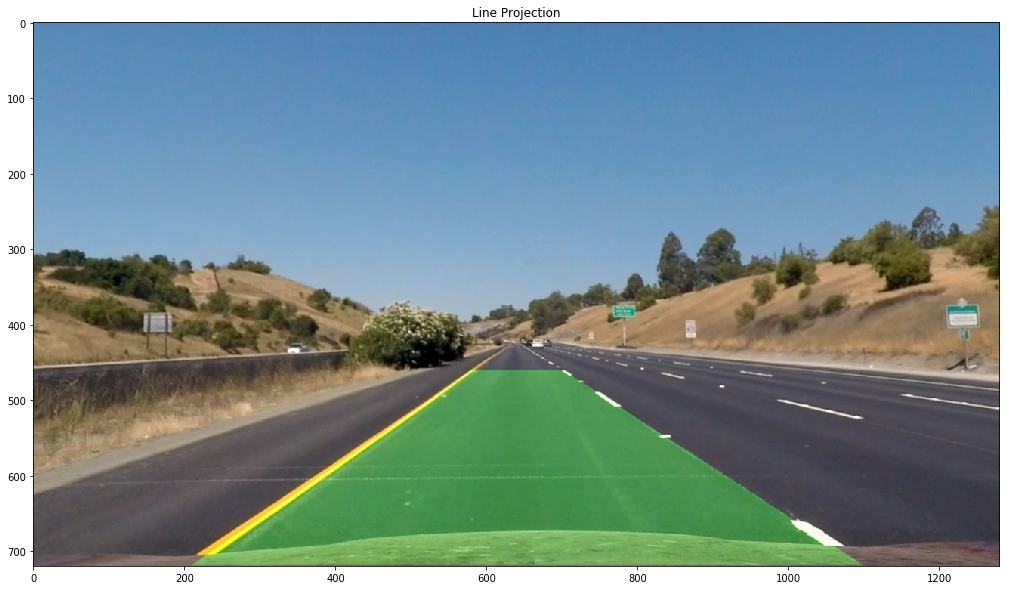

In [13]:
def project_lines_and_unwarp(undistorted, left_fit, right_fit):
    ## Visualization ##
    left_fitx, right_fitx, ploty = create_plot_data(left_fit, right_fit)
    
    # Create an image to draw the lines on
    warp_zero = np.zeros((height, width)).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (width, height)) 
    # Combine the result with the original image
    result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
    
    return result
    
result = project_lines_and_unwarp(undistorted, left_fit, right_fit)
fig, (ax2) = plt.subplots(1, 1)
ax2.imshow(toRGB(result))
ax2.set_title('Line Projection')
fig.set_size_inches(20, 10)
#fig.tight_layout()
plt.savefig('output_images/line_projection.jpg')

### Statistics

In [12]:
def car_position(left_fit, right_fit):
    left_fitx, right_fitx, ploty = create_plot_data(left_fit, right_fit)
    left_fitx = left_fitx[height-100:]
    right_fitx = right_fitx[height-100:]
    dx = right_fitx - left_fitx
    lane_center_x = np.mean(left_fitx + dx/2)
    car_pos_x = width//2
    d_lane_center = car_pos_x - lane_center_x
    
    lane_width_x = np.mean(dx)
    c = 3.7/lane_width_x
    return d_lane_center*c

def radius(left_fit, right_fit):
    y_eval = height # image bottom
    left_radius = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_radius = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    return left_radius, right_radius

## Define the Pipeline

In [55]:
def pipeline(image, left_fit_last, right_fit_last):
    undistorted = undistort(image)
    warped = perspectiveTransform(undistorted, M)
    if False:
        overlaySrcAndDes(undistorted, warped, src, dst)
    binary_warped = s_sx_threshold(warped)
    left_fit, right_fit, out_img = find_lane_pixels_and_fit_poly(binary_warped, left_fit_last, right_fit_last)
    result = project_lines_and_unwarp(undistorted, left_fit, right_fit)
    cpp = car_position(left_fit, right_fit)
    
    text = 'cpp : {:4.2f}m'.format(cpp)
    cv2.putText(result, text, (width//2-70, height-50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 3, cv2.LINE_AA)
    
    left_radius, right_radius = radius(left_fit, right_fit)
    text = 'r_left : {:4.0f}m'.format(left_radius)
    cv2.putText(result, text, (70, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 3, cv2.LINE_AA)
    text = 'r_right : {:4.0f}m'.format(right_radius)
    cv2.putText(result, text, (width - 300, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 3, cv2.LINE_AA)
    
    return result, left_fit, right_fit

## Test on sample images

test_images\straight_lines1.jpg


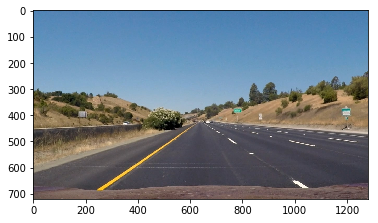

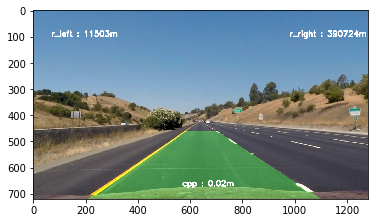

test_images\straight_lines2.jpg


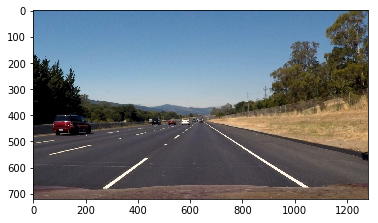

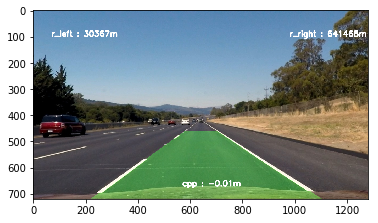

test_images\test1.jpg


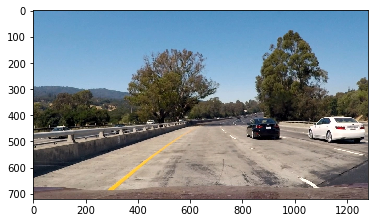

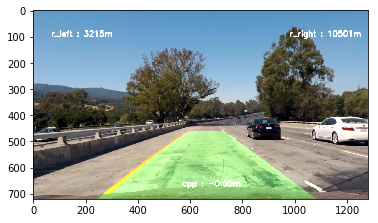

test_images\test2.jpg


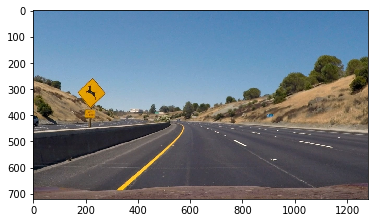

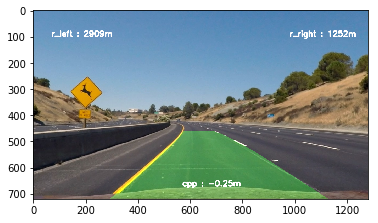

test_images\test3.jpg


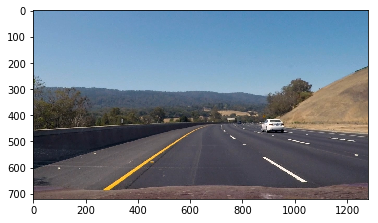

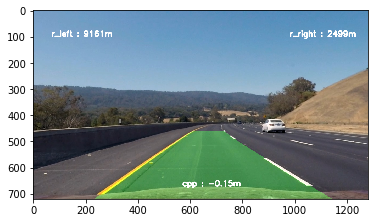

test_images\test4.jpg


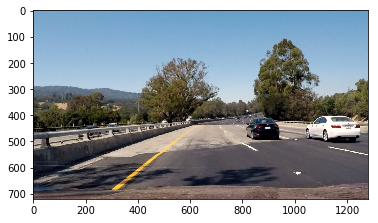

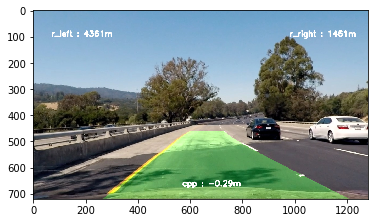

test_images\test5.jpg


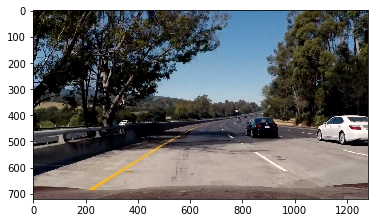

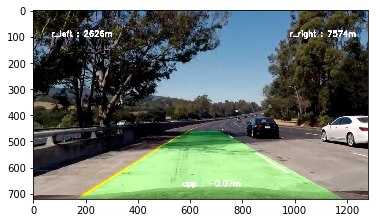

test_images\test6.jpg


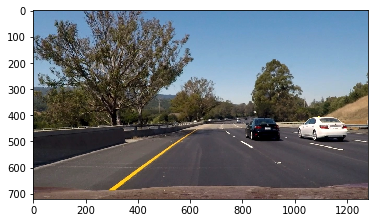

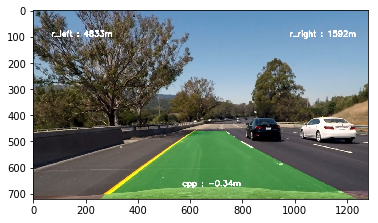

In [56]:
image_files = glob.glob('test_images/*.jpg')

left_fit = None
right_fit = None

for fname in image_files:
    print(fname)
    image = cv2.imread(fname)
    plt.imshow(toRGB(image))
    plt.show()
    result, left_fit, right_fit = pipeline(image, left_fit, right_fit)
    plt.imshow(toRGB(result))
    plt.show()
    
test_images\test3.jpg

In [14]:
# Definition of a line class
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = None  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

## Run the pipeline on the video

In [57]:
import traceback

# Video writer parameters
cap = cv2.VideoCapture('project_video.mp4')
framerate = cap.get(cv2.CAP_PROP_FPS)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('finding_lane_lines.mp4',fourcc, framerate, 
                      (int(width), int(height)))

from progressbar import ProgressBar, SimpleProgress

# Instantial a global left and right line
global left_line, right_line
left_line = Line()
right_line = Line()

pbar = ProgressBar(maxval=num_frames).start()
count = 0
while cap.isOpened():
    ret,frame = cap.read()
    if ret:
        # cv2.imshow('window-name',frame)
        # result, left_fit, right_fit = pipeline(image, left_line.current_fit, right_line.current_fit)
        try:
            result, left_fit, right_fit = pipeline(frame, left_line.current_fit, right_line.current_fit)
        except TypeError as e:
            traceback_str = ''.join(traceback.format_tb(e.__traceback__))
            print(traceback_str)
            plt.imshow(toRGB(frame))
            plt.show()
            print("Error at frame:", count)
            # try with windowing 
            result, left_fit, right_fit = pipeline(image, None, None)
        left_line.current_fit = left_fit
        right_line.current_fit = right_fit
        # cv2.imwrite("output_images/frame%d.jpg" % count, result)
        out.write(result)
        count = count + 1
        pbar.update(count)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break

pbar.finish()
cap.release()
out.release()
cv2.destroyAllWindows()  # destroy all the opened windows

100% |########################################################################|
